In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.columns = [column.lower() for column in customer_df.columns]
customer_df.columns = customer_df.columns.str.replace(" ","_")

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [44]:
# 1. Open the categoricals variable we created before.

In [45]:
categorical_df = customer_df.select_dtypes(object)
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [46]:
# 2. Plot all the categorical variables with the proper plot. What can you see?

In [47]:
# for i in categorical_df:
#     while categorical_df.policy not in categorical_df:
#         sns.countplot(data=categorical_df, x=i)
#         plt.show()

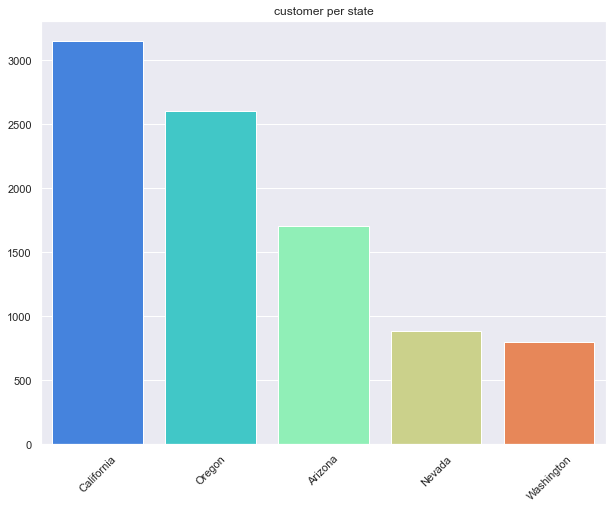

In [48]:
# state plot
order = ['California','Oregon','Arizona','Nevada','Washington']
state = sns.countplot(data=categorical_df, order = order,
                      x = 'state', palette = 'rainbow')
state.set_xticklabels(rotation=45,labels=order)
sns.set(rc = {'figure.figsize':(8,6)})
plt.xlabel("")
plt.ylabel("")
plt.title('customer per state')

plt.show()

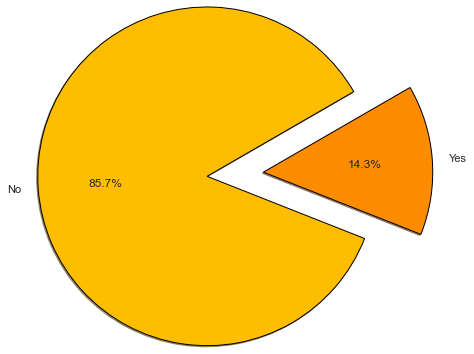

In [49]:
plt.style.use('_mpl-gallery-nogrid')
# make data
x = categorical_df.response.value_counts().astype(float)
colors = plt.get_cmap('Wistia')(np.linspace(0.5, 0.9, len(x)))
# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(0, 0), labels = x.index, autopct='%1.1f%%',
       wedgeprops={"linewidth": 1,"edgecolor": "black"}, explode= (1,0),
      shadow=True, startangle=30)
plt.show()
# Pacman invaded my lab

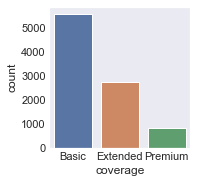

In [50]:
sns.countplot(data=categorical_df,x=categorical_df.coverage)
sns.set(rc = {'figure.figsize':(5,3)})

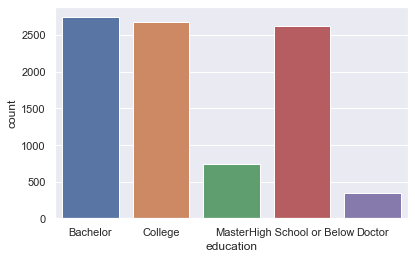

In [51]:
sns.countplot(data=categorical_df,x=categorical_df.education)
sns.set(rc = {'figure.figsize':(5,3)})

<AxesSubplot:xlabel='employmentstatus', ylabel='count'>

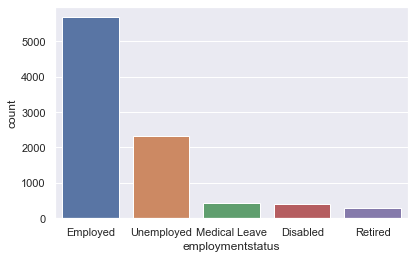

In [52]:
sns.countplot(data=categorical_df,x=categorical_df.employmentstatus)

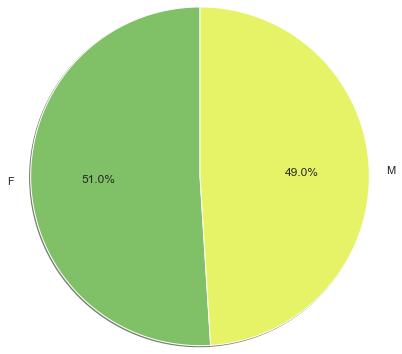

In [53]:
# sns.countplot(data=categorical_df,x=categorical_df.gender)

plt.style.use('_mpl-gallery-nogrid')
# make data
x = categorical_df.gender.value_counts().astype(float)
colors = plt.get_cmap('summer')(np.linspace(0.5, 0.9, len(x)))
# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, labels = x.index, autopct='%1.1f%%',
       wedgeprops={"linewidth": 1},
      shadow=True, startangle=90)
plt.show()

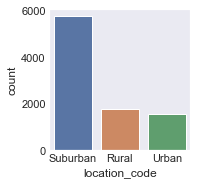

In [54]:
sns.countplot(data=categorical_df,x=categorical_df.location_code)
sns.set(rc = {'figure.figsize':(5,3)})

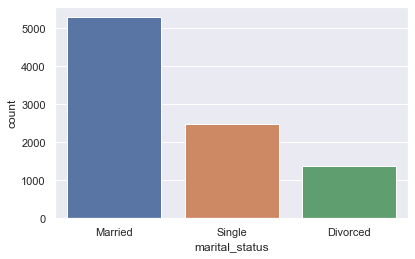

In [55]:
sns.countplot(data=categorical_df,x=categorical_df.marital_status)
sns.set(rc = {'figure.figsize':(5,3)})

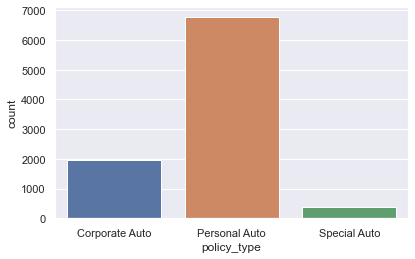

In [56]:
sns.countplot(data=categorical_df,x=categorical_df.policy_type)
sns.set(rc = {'figure.figsize':(5,3)})

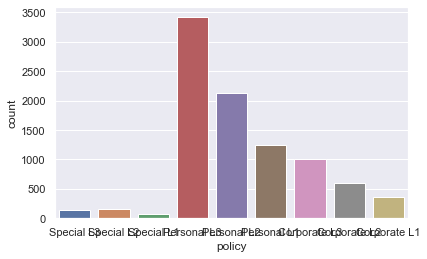

In [57]:
sns.countplot(data=categorical_df,x=categorical_df.policy.sort_values(ascending=False))
sns.set(rc = {'figure.figsize':(12,7)})

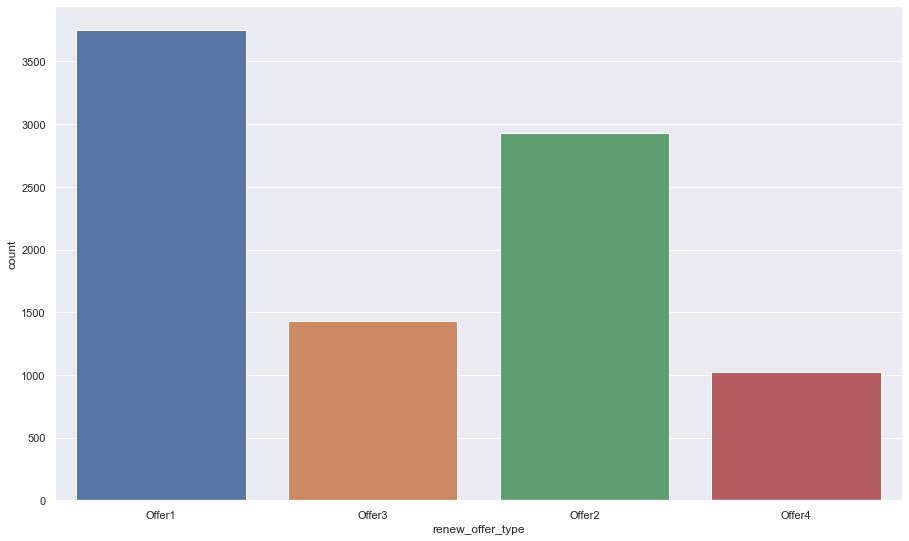

In [58]:
sns.countplot(data=categorical_df,x=categorical_df.renew_offer_type)
sns.set(rc = {'figure.figsize':(5,3)})

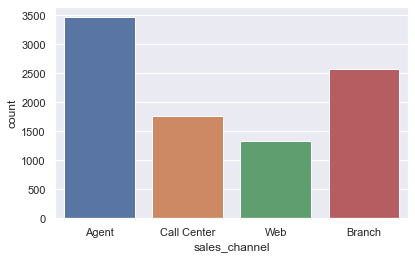

In [59]:
sns.countplot(data=categorical_df,x=categorical_df.sales_channel)
sns.set(rc = {'figure.figsize':(5,3)})

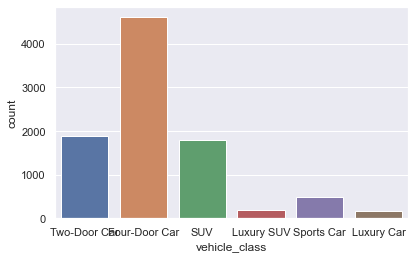

In [60]:
sns.countplot(data=categorical_df,x=categorical_df.vehicle_class)
sns.set(rc = {'figure.figsize':(5,3)})

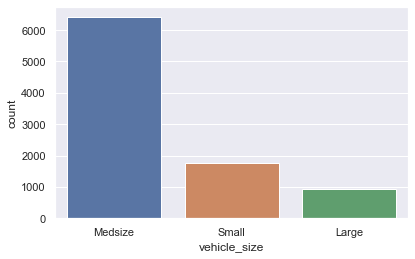

In [61]:
sns.countplot(data=categorical_df,x=categorical_df.vehicle_size)
sns.set(rc = {'figure.figsize':(5,3)})

In [62]:
# 3. There might be some columns that seem to be redundant, check their values to be sure. 
# What should we do with them?

In [63]:
# dropping those bad bois!
# customer_id, policy, renew_offer_type, education, vehicle_class, employmentstatus

In [64]:
# checking policy and policy_type for "correlation"
data_crosstab = pd.crosstab(categorical_df.policy_type,categorical_df.policy, margins = False) 
display(data_crosstab)
print('p-value: ',st.chi2_contingency(data_crosstab)[1])
# p is lower than alpha -> rejecting H0 -> dependent variables

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


p-value:  0.0


In [65]:
# checking sales_channel and renew_offer_type for "correlation"
data_crosstab = pd.crosstab(categorical_df.sales_channel,categorical_df.renew_offer_type, margins = False) 
display(data_crosstab)
print('p-value: ',st.chi2_contingency(data_crosstab)[1])
# p is lower than alpha -> rejecting H0 -> dependent variables

renew_offer_type,Offer1,Offer2,Offer3,Offer4
sales_channel,,,,
Agent,1690,978,518,291
Branch,1099,788,394,286
Call Center,588,647,291,239
Web,375,513,229,208


p-value:  2.695651366787274e-46


In [66]:
# checking marital_status and location_code for "correlation"
data_crosstab = pd.crosstab(categorical_df.marital_status,categorical_df.location_code, margins = False) 
display(data_crosstab)
print('p-value: ',st.chi2_contingency(data_crosstab)[1])
# p is lower than alpha -> rejecting H0 -> dependent variables

location_code,Rural,Suburban,Urban
marital_status,,,
Divorced,281,870,218
Married,1227,2944,1127
Single,265,1965,237


p-value:  2.787741035216401e-90


In [67]:
# checking education and coverage for "correlation"
data_crosstab = pd.crosstab(categorical_df.education,categorical_df.coverage, margins = False) 
display(data_crosstab)
print('p-value: ',st.chi2_contingency(data_crosstab)[1])
# p is lower than alpha -> rejecting H0 -> dependent variables

coverage,Basic,Extended,Premium
education,,,
Bachelor,1729,769,250
College,1628,827,226
Doctor,200,122,20
High School or Below,1561,800,261
Master,450,224,67


p-value:  0.016840896351508344


In [68]:
# checking vehicle_class and vehicle_size for "correlation"
data_crosstab = pd.crosstab(categorical_df.vehicle_class,categorical_df.vehicle_size, margins = False) 
display(data_crosstab)
print('p-value: ',st.chi2_contingency(data_crosstab)[1])
# p is lower than alpha -> rejecting H0 -> dependent variables

vehicle_size,Large,Medsize,Small
vehicle_class,,,
Four-Door Car,475,3237,909
Luxury Car,16,106,41
Luxury SUV,18,125,41
SUV,167,1308,321
Sports Car,49,366,69
Two-Door Car,221,1282,383


p-value:  0.006024951458906972


In [69]:
# checking employmentstatus and gender for "correlation"
data_crosstab = pd.crosstab(categorical_df.employmentstatus,categorical_df.gender, margins = False) 
display(data_crosstab)
print('p-value: ',st.chi2_contingency(data_crosstab)[1])
# p is lower than alpha -> rejecting H0 -> dependent variables

gender,F,M
employmentstatus,,
Disabled,244,161
Employed,2937,2761
Medical Leave,214,218
Retired,128,154
Unemployed,1135,1182


p-value:  0.00018151136449675047


In [70]:
# 4. Plot time variable. Can you extract something from it?

In [71]:
# not really

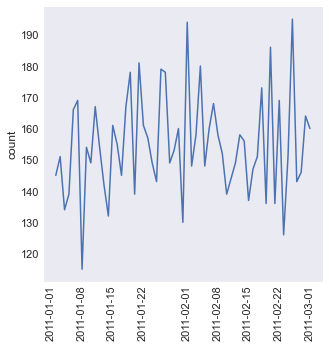

In [460]:
date = customer_df['effective_to_date']
counts = date.value_counts()
# counts

g = sns.relplot(x=date.unique(), y=counts, kind="line", data=date)
g.figure.autofmt_xdate(rotation=90)
plt.xlabel("") 
plt.ylabel("count") 

plt.show()